In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as pre
from sklearn.tree import DecisionTreeRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor
import time

## Data Loading

In [2]:
#loading the train,test and sample datasets
train = pd.read_csv("E:/Sem 2/ML/exam/train_SJC.csv")
test = pd.read_csv("E:/Sem 2/ML/exam/Test_SJC.csv")

In [3]:
print("Train data :",train.shape)
print("Test data :",test.shape)

Train data : (36176, 15)
Test data : (17824, 14)


## Data preprocessing 

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36176 entries, 0 to 36175
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ClaimNumber                36176 non-null  object 
 1   DateTimeOfAccident         36176 non-null  object 
 2   DateReported               36176 non-null  object 
 3   Age                        36176 non-null  int64  
 4   Gender                     36176 non-null  object 
 5   MaritalStatus              36154 non-null  object 
 6   DependentChildren          36176 non-null  int64  
 7   DependentsOther            36176 non-null  int64  
 8   WeeklyWages                36120 non-null  float64
 9   PartTimeFullTime           36176 non-null  object 
 10  HoursWorkedPerWeek         36127 non-null  float64
 11  DaysWorkedPerWeek          36176 non-null  int64  
 12  ClaimDescription           36176 non-null  object 
 13  InitialIncurredCalimsCost  36176 non-null  int

### Missing value imputation

ClaimNumber                   0
DateTimeOfAccident            0
DateReported                  0
Age                           0
Gender                        0
MaritalStatus                22
DependentChildren             0
DependentsOther               0
WeeklyWages                  56
PartTimeFullTime              0
HoursWorkedPerWeek           49
DaysWorkedPerWeek             0
ClaimDescription              0
InitialIncurredCalimsCost     0
UltimateIncurredClaimCost     0
dtype: int64


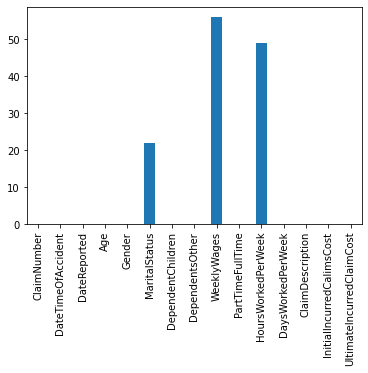

In [5]:
print(train.isnull().sum())
train.isnull().sum().plot.bar()

ClaimNumber                  0
DateTimeOfAccident           0
DateReported                 0
Age                          0
Gender                       0
MaritalStatus                7
DependentChildren            0
DependentsOther              0
WeeklyWages                  0
PartTimeFullTime             0
HoursWorkedPerWeek           0
DaysWorkedPerWeek            0
ClaimDescription             0
InitialIncurredCalimsCost    0
dtype: int64


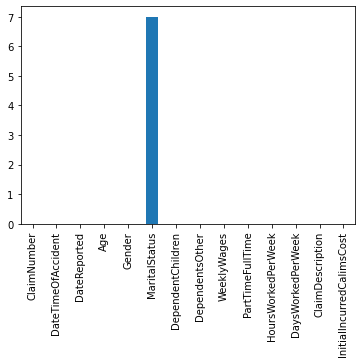

In [6]:
print(test.isnull().sum())
test.isnull().sum().plot.bar()

In [7]:
train.MaritalStatus.value_counts()

S    17450
M    15162
U     3542
Name: MaritalStatus, dtype: int64

In [8]:
train['MaritalStatus'].fillna('U',inplace = True)
test['MaritalStatus'].fillna('U',inplace = True)

In [9]:
train['WeeklyWages'].fillna(train['WeeklyWages'].mean(),inplace = True)
test['WeeklyWages'].fillna(test['WeeklyWages'].mean(),inplace = True)

In [10]:
train['HoursWorkedPerWeek'].fillna(train['HoursWorkedPerWeek'].mean(),inplace = True)

In [11]:
print(test.isnull().sum())

ClaimNumber                  0
DateTimeOfAccident           0
DateReported                 0
Age                          0
Gender                       0
MaritalStatus                0
DependentChildren            0
DependentsOther              0
WeeklyWages                  0
PartTimeFullTime             0
HoursWorkedPerWeek           0
DaysWorkedPerWeek            0
ClaimDescription             0
InitialIncurredCalimsCost    0
dtype: int64


In [12]:
#data=train.sample(1000)
data=train

In [13]:
data_test=test

In [14]:
data.shape

(36176, 15)

### Data transformation

In [15]:
data['DateTimeOfAccident']=pd.to_datetime(data['DateTimeOfAccident'])
data_test['DateTimeOfAccident']=pd.to_datetime(data_test['DateTimeOfAccident'])

In [16]:
data['DateReported']=pd.to_datetime(data['DateReported'])
data_test['DateReported']=pd.to_datetime(data_test['DateReported'])

In [168]:
data.head()

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost
0,WC8205482,2002-04-09 07:00:00+00:00,2002-07-05 00:00:00+00:00,48,M,M,0,0,500.00,F,38.0,5,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388
1,WC6922469,1999-01-07 11:00:00+00:00,1999-01-20 00:00:00+00:00,43,F,M,0,0,509.34,F,37.5,5,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819
2,WC5442654,1996-03-25 00:00:00+00:00,1996-04-14 00:00:00+00:00,30,M,U,0,0,709.10,F,38.0,5,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087
3,WC9796897,2005-06-22 13:00:00+00:00,2005-07-22 00:00:00+00:00,41,M,S,0,0,555.46,F,38.0,5,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.487170
4,WC2603726,1990-08-29 08:00:00+00:00,1990-09-27 00:00:00+00:00,36,M,M,0,0,377.10,F,38.0,5,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...,2800,4014.002925


In [169]:
data['Yearofaccident']=data.DateTimeOfAccident.dt.year
data_test['Yearofaccident']=data.DateTimeOfAccident.dt.year

In [170]:
data['Hourofaccident']=data.DateTimeOfAccident.dt.hour

In [171]:
#data['Time_bin']=pd.cut(data['Time'],bins=4, labels=['Morning','Afternoon','Evening','Night'])

In [172]:
data['Acc_Day'] = data['DateTimeOfAccident'].dt.dayofweek

data['Acc_Month'] = data['DateTimeOfAccident'].dt.month

data['Acc_Year'] = data['DateTimeOfAccident'].dt.year

In [173]:
data['DayOfReportedDelay']=data.DateReported-data.DateTimeOfAccident

In [174]:
data['DayOfReportedDelay']=data['DayOfReportedDelay'].astype('<m8[D]')

In [175]:
data['DayOfReportedDelay']=data['DayOfReportedDelay'].astype('int64')

In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36176 entries, 0 to 36175
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   ClaimNumber                36176 non-null  object             
 1   DateTimeOfAccident         36176 non-null  datetime64[ns, UTC]
 2   DateReported               36176 non-null  datetime64[ns, UTC]
 3   Age                        36176 non-null  int64              
 4   Gender                     36176 non-null  object             
 5   MaritalStatus              36176 non-null  object             
 6   DependentChildren          36176 non-null  int64              
 7   DependentsOther            36176 non-null  int64              
 8   WeeklyWages                36176 non-null  float64            
 9   PartTimeFullTime           36176 non-null  object             
 10  HoursWorkedPerWeek         36176 non-null  float64            
 11  Da

In [177]:
data.head()

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,...,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost,Yearofaccident,Hourofaccident,Acc_Day,Acc_Month,Acc_Year,DayOfReportedDelay
0,WC8205482,2002-04-09 07:00:00+00:00,2002-07-05 00:00:00+00:00,48,M,M,0,0,500.00,F,...,5,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388,2002,7,1,4,2002,86
1,WC6922469,1999-01-07 11:00:00+00:00,1999-01-20 00:00:00+00:00,43,F,M,0,0,509.34,F,...,5,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819,1999,11,3,1,1999,12
2,WC5442654,1996-03-25 00:00:00+00:00,1996-04-14 00:00:00+00:00,30,M,U,0,0,709.10,F,...,5,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087,1996,0,0,3,1996,20
3,WC9796897,2005-06-22 13:00:00+00:00,2005-07-22 00:00:00+00:00,41,M,S,0,0,555.46,F,...,5,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.487170,2005,13,2,6,2005,29
4,WC2603726,1990-08-29 08:00:00+00:00,1990-09-27 00:00:00+00:00,36,M,M,0,0,377.10,F,...,5,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...,2800,4014.002925,1990,8,2,8,1990,28


## EDA

#### Univariate

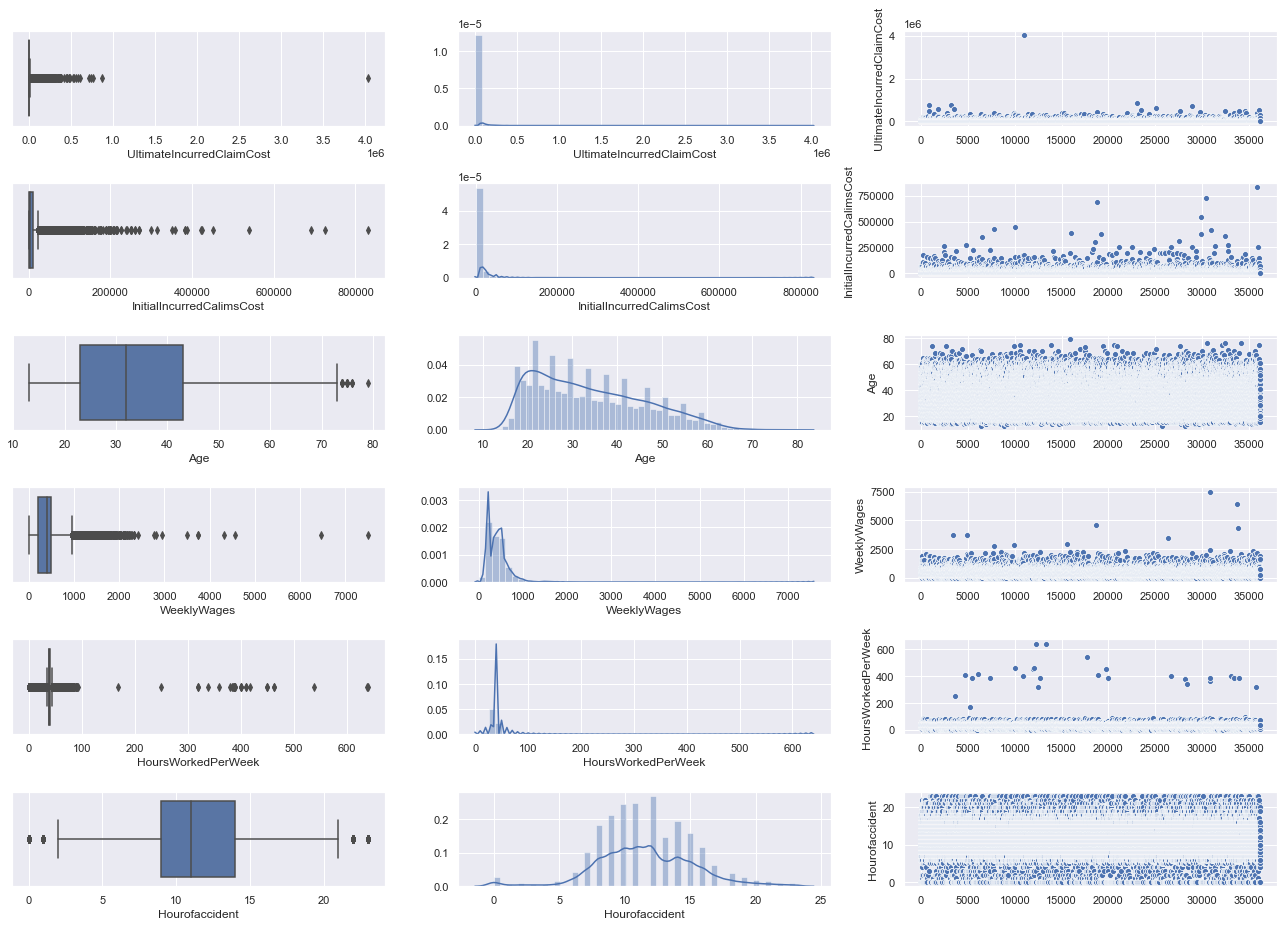

In [178]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(6, 3, figsize = (18, 13))
sns.boxplot(x= data["UltimateIncurredClaimCost"], ax = ax[0,0])
sns.distplot(data['UltimateIncurredClaimCost'], ax = ax[0,1])
sns.scatterplot(data.index,data['UltimateIncurredClaimCost'],ax=ax[0,2])
sns.boxplot(x= data["InitialIncurredCalimsCost"], ax = ax[1,0])
sns.distplot(data['InitialIncurredCalimsCost'], ax = ax[1,1])
sns.scatterplot(data.index,data['InitialIncurredCalimsCost'],ax=ax[1,2])
sns.boxplot(x= data["Age"], ax = ax[2,0])
sns.distplot(data['Age'], ax = ax[2,1])
sns.scatterplot(data.index,data['Age'],ax=ax[2,2])
sns.boxplot(x= data["WeeklyWages"], ax = ax[3,0])
sns.distplot(data['WeeklyWages'], ax = ax[3,1])
sns.scatterplot(data.index,data['WeeklyWages'],ax=ax[3,2])
sns.boxplot(x= data["HoursWorkedPerWeek"], ax = ax[4,0])
sns.distplot(data['HoursWorkedPerWeek'], ax = ax[4,1])
sns.scatterplot(data.index,data['HoursWorkedPerWeek'],ax=ax[4,2])
sns.boxplot(x= data["Hourofaccident"],ax= ax[5,0])
sns.distplot(data['Hourofaccident'], ax = ax[5,1])
sns.scatterplot(data.index,data['Hourofaccident'],ax=ax[5,2])

plt.tight_layout()

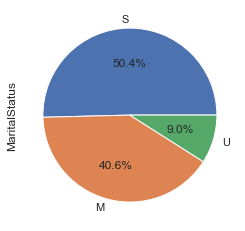

In [203]:
data.MaritalStatus.value_counts().plot.pie(autopct="%.1f%%")

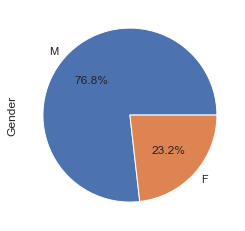

In [204]:
data.Gender.value_counts().plot.pie(autopct="%.1f%%")

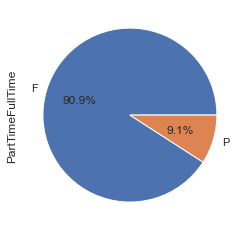

In [205]:
data.PartTimeFullTime.value_counts().plot.pie(autopct="%.1f%%")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 <a list of 18 Text major ticklabel objects>)

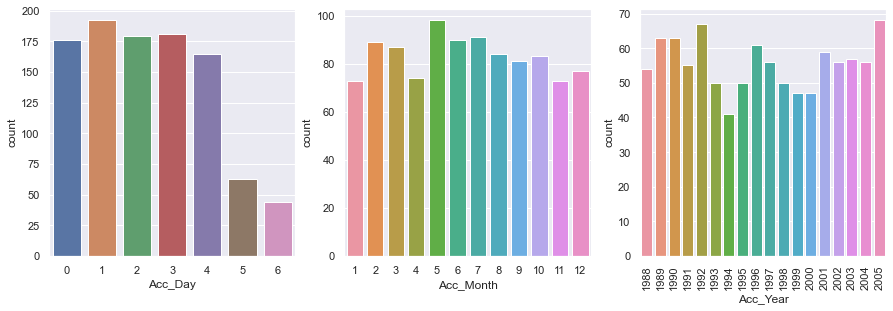

In [220]:
fig = plt.figure(figsize = (15,10))

ax1 = fig.add_subplot(2,3,1)
sns.countplot(data = data, x = 'Acc_Day')
ax2 = fig.add_subplot(2,3,2)
sns.countplot(data = data, x = 'Acc_Month')
ax3 = fig.add_subplot(2,3,3)
sns.countplot(data = data, x = 'Acc_Year')
plt.xticks(rotation=90)

#### Bivariate

In [59]:
data.select_dtypes(include=('object')).columns

Index(['ClaimNumber', 'Gender', 'MaritalStatus', 'PartTimeFullTime',
       'ClaimDescription'],
      dtype='object')

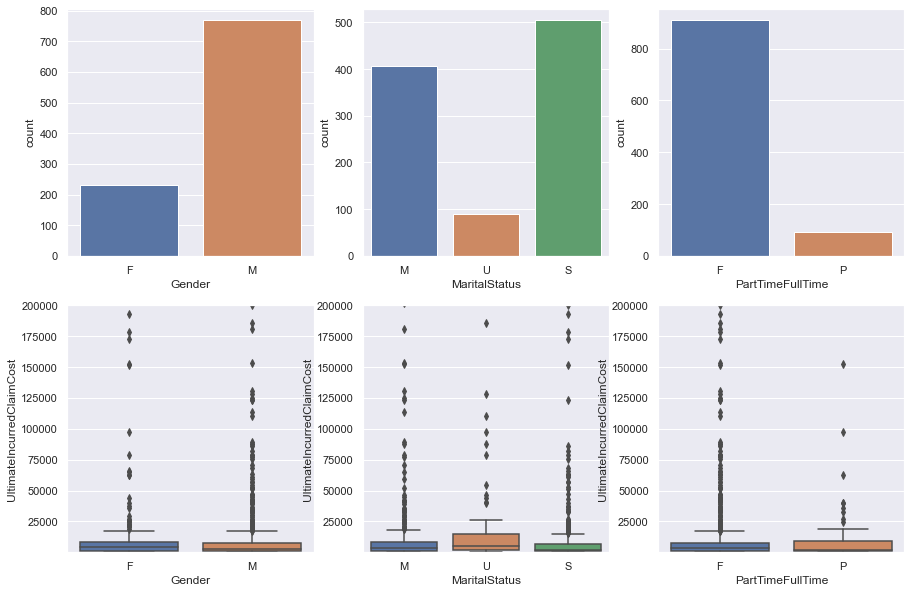

In [207]:
fig = plt.figure(figsize = (15,10))

ax1 = fig.add_subplot(2,3,1)
sns.countplot(data = data, x = 'Gender', ax=ax1)

ax2 = fig.add_subplot(2,3,2)
sns.countplot(data = data, x = 'MaritalStatus', ax=ax2)

ax3 = fig.add_subplot(2,3,3)
sns.countplot(data = data, x = 'PartTimeFullTime', ax=ax3)

ax4 = fig.add_subplot(2,3,4)
plt.ylim(10, 200000)
sns.boxplot(data = data, x = 'Gender', y = 'UltimateIncurredClaimCost' , ax=ax4)

ax5 = fig.add_subplot(2,3,5)
plt.ylim(10, 200000)
sns.boxplot(data = data, x = 'MaritalStatus', y = 'UltimateIncurredClaimCost', ax=ax5)

ax6 = fig.add_subplot(2,3,6)
plt.ylim(10, 200000)
sns.boxplot(data = data, x = 'PartTimeFullTime', y = 'UltimateIncurredClaimCost', ax=ax6)

In [208]:
#data1=data.drop(data[data.UltimateIncurredClaimCost==data.UltimateIncurredClaimCost[data.Gender=='F'].max()].index)

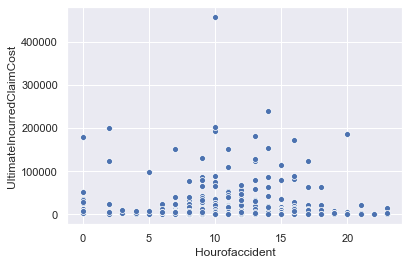

In [209]:
sns.scatterplot(data.Hourofaccident,data.UltimateIncurredClaimCost)

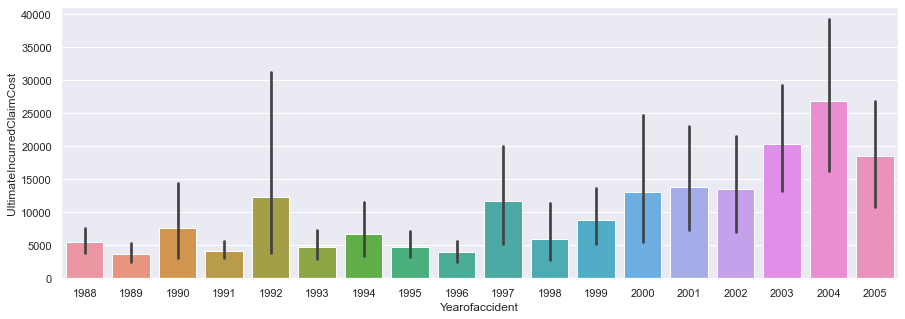

In [210]:
fig = plt.figure(figsize=(15,5))
sns.barplot(data.Yearofaccident,data.UltimateIncurredClaimCost)

Correlation : 0.028798155294483464


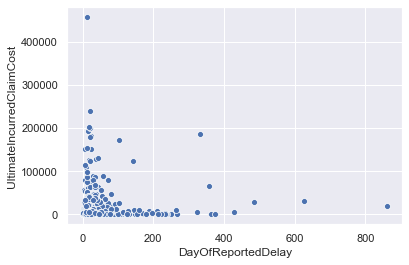

In [213]:
print('Correlation :',data.DayOfReportedDelay.corr(data.UltimateIncurredClaimCost))
sns.scatterplot(data.DayOfReportedDelay,data.UltimateIncurredClaimCost)

Correlation : 0.45381267143245013


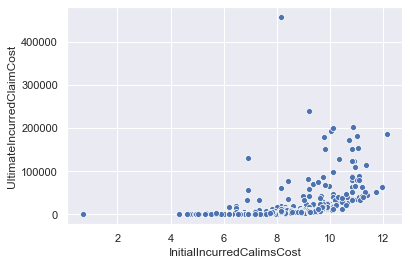

In [215]:
print('Correlation :',data.InitialIncurredCalimsCost.corr(data.UltimateIncurredClaimCost))
sns.scatterplot(data.InitialIncurredCalimsCost,data.UltimateIncurredClaimCost)

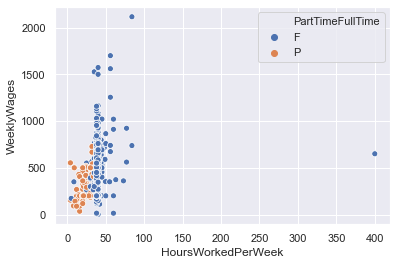

In [216]:
sns.scatterplot(data.HoursWorkedPerWeek,data.WeeklyWages,hue=data.PartTimeFullTime)

Correlation : 0.1992287717387763


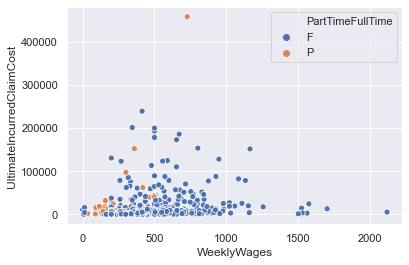

In [217]:
print('Correlation :',data.WeeklyWages.corr(data.UltimateIncurredClaimCost))
sns.scatterplot(data.WeeklyWages,data.UltimateIncurredClaimCost,hue=data.PartTimeFullTime)

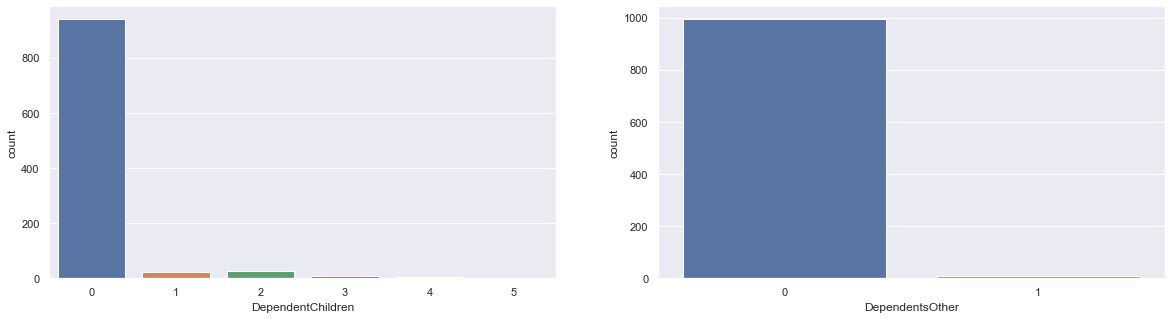

In [218]:
fig = plt.figure(figsize = (20,5))

ax1 = fig.add_subplot(1,2,1)
sns.countplot('DependentChildren',data=data,ax=ax1)
ax2 = fig.add_subplot(1,2,2)
sns.countplot('DependentsOther',data=data,ax=ax2)

#### Multivariate 

In [245]:
data.columns

Index(['ClaimNumber', 'DateTimeOfAccident', 'DateReported', 'Age', 'Gender',
       'MaritalStatus', 'DependentChildren', 'DependentsOther', 'WeeklyWages',
       'PartTimeFullTime', 'HoursWorkedPerWeek', 'DaysWorkedPerWeek',
       'ClaimDescription', 'InitialIncurredCalimsCost',
       'UltimateIncurredClaimCost', 'Yearofaccident', 'Hourofaccident',
       'DayOfReportedDelay', 'Acc_Day', 'Acc_Month', 'Acc_Year'],
      dtype='object')

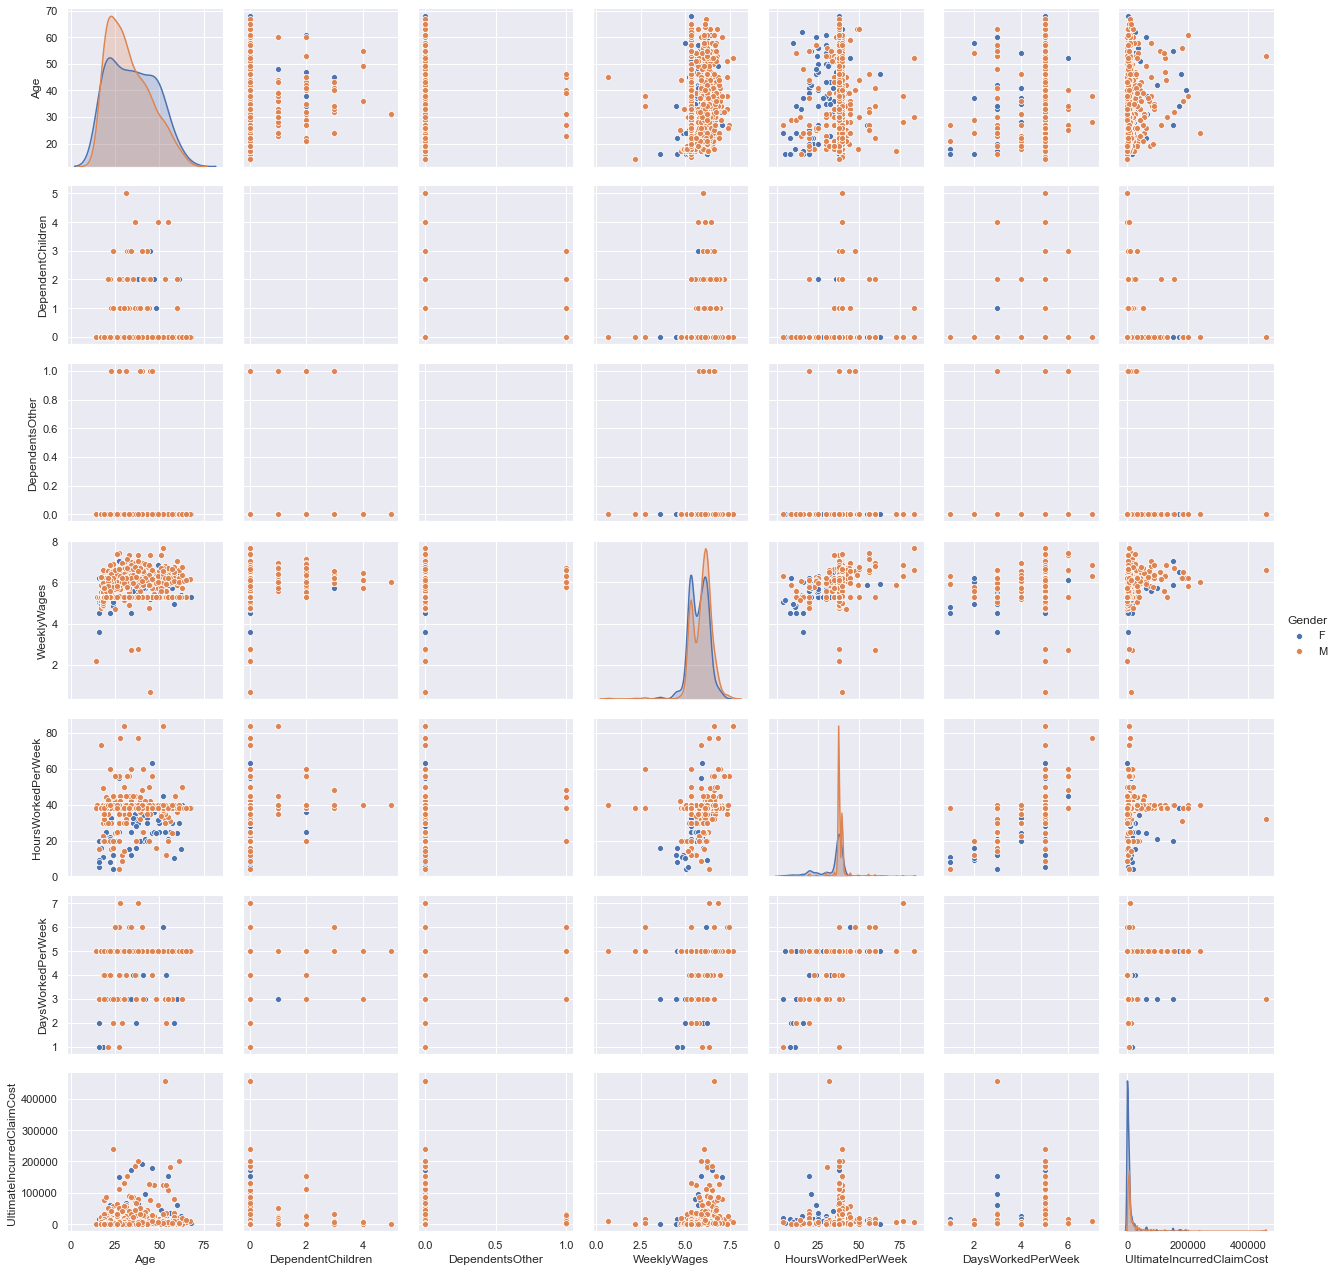

In [251]:
sns.pairplot(data[['Age','Gender',
       'DependentChildren', 'DependentsOther', 'WeeklyWages', 'HoursWorkedPerWeek', 'DaysWorkedPerWeek','UltimateIncurredClaimCost']],hue='Gender')

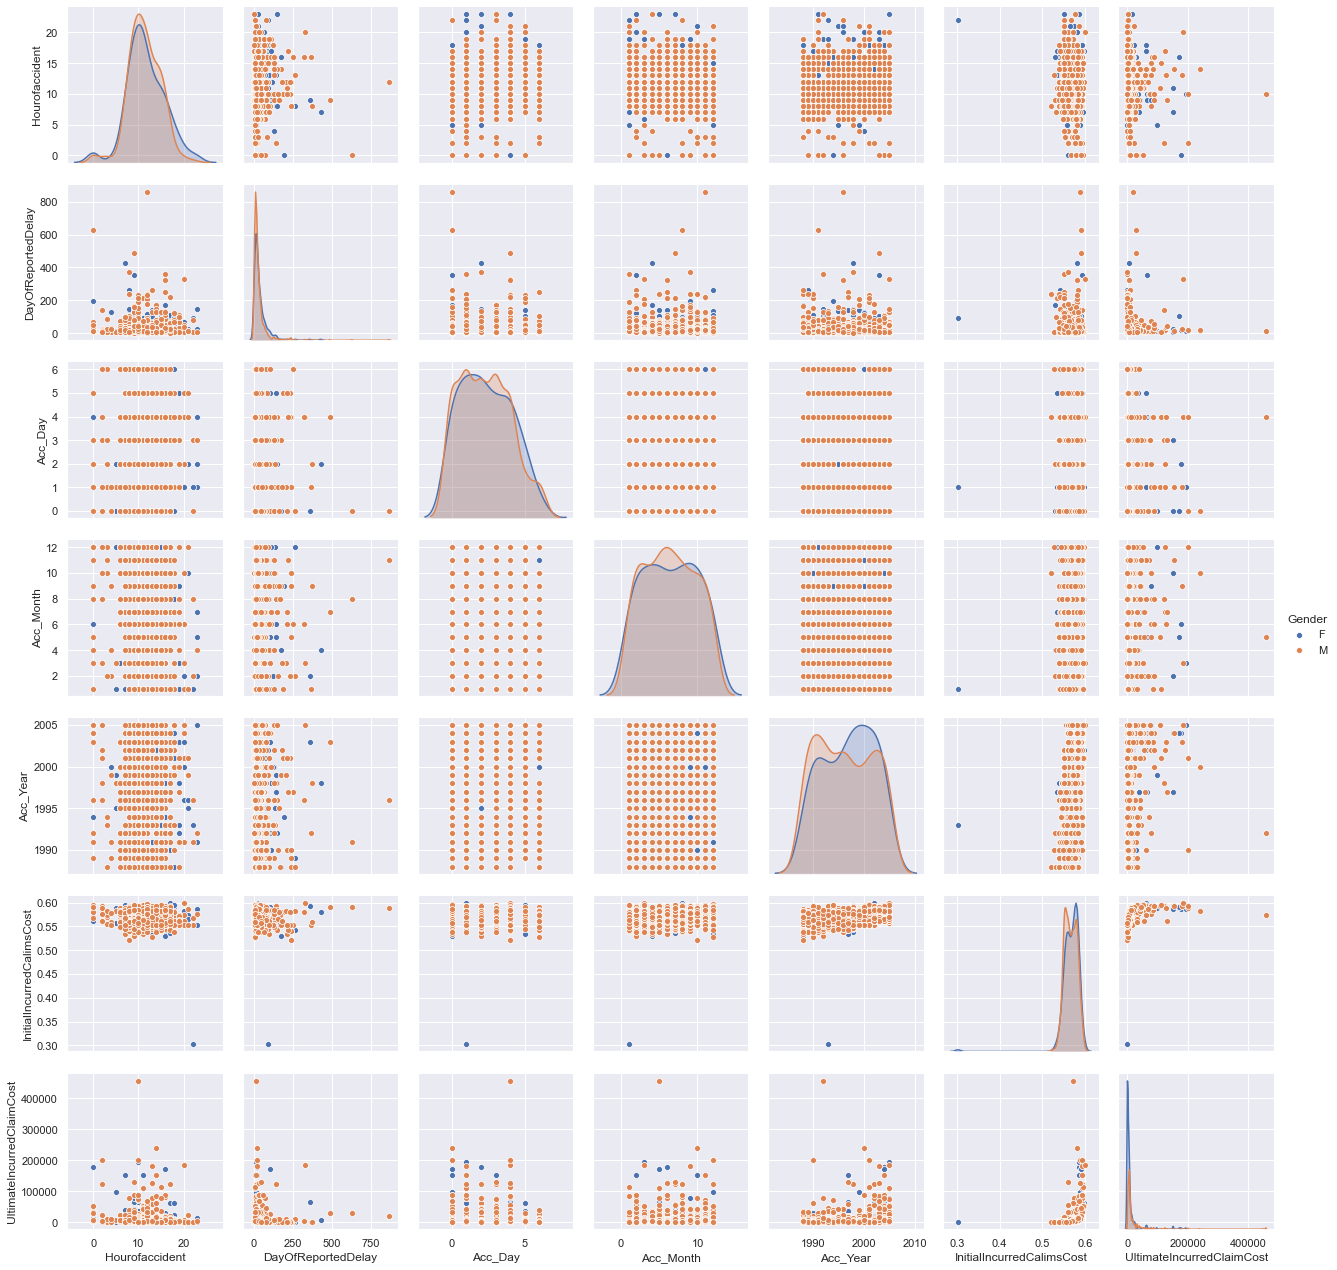

In [254]:
sns.pairplot(data[['Hourofaccident','Gender',
       'DayOfReportedDelay', 'Acc_Day', 'Acc_Month', 'Acc_Year', 'InitialIncurredCalimsCost',
       'UltimateIncurredClaimCost']],hue='Gender')

#### Correlation

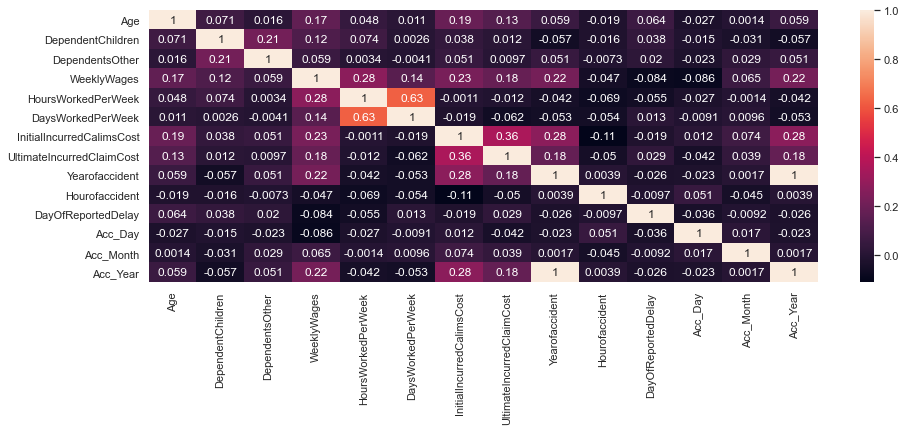

In [244]:
sns.set(style="darkgrid")
fig = plt.figure(figsize=(15,5))
sns.heatmap(data.corr(), annot=True)

### Outlier imputation

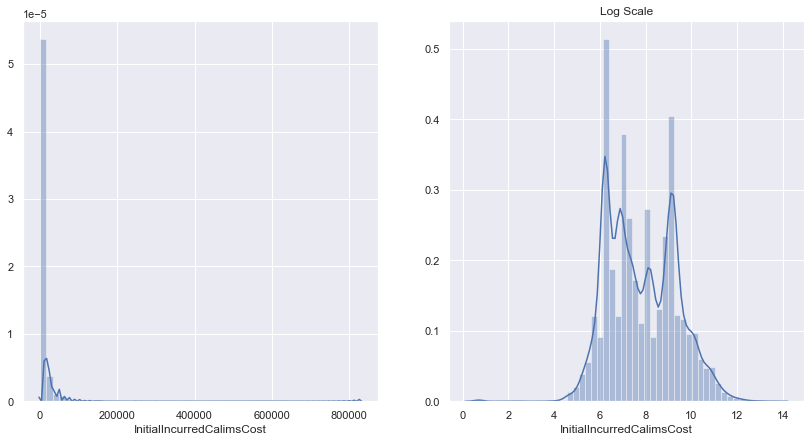

In [179]:
# Transform the InitialIncurredCalimsCost into the log scale
plt.figure(figsize = (14, 7))
plt.subplot(1, 2, 1)
sns.distplot(data['InitialIncurredCalimsCost'])
plt.subplot(1, 2, 2)
plt.title('Log Scale')
sns.distplot(np.log1p(data['InitialIncurredCalimsCost']))
data['InitialIncurredCalimsCost']=np.log1p(data['InitialIncurredCalimsCost'])

count    36176.000000
mean        37.766820
std         12.485858
min          0.000000
25%         38.000000
50%         38.000000
75%         40.000000
max        640.000000
Name: HoursWorkedPerWeek, dtype: float64


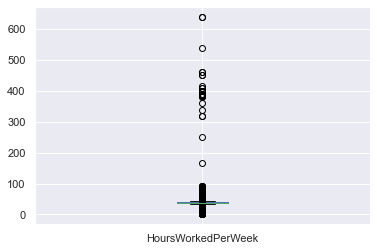

In [180]:
#Here, There are 1 entries with high HoursWorkedPerWeek, so drop that row
print(data.HoursWorkedPerWeek.describe())
data.HoursWorkedPerWeek.plot.box()

In [181]:
print(f"There are {data[data['HoursWorkedPerWeek'] >= 400.000].__len__()} entries with HoursWorkedPerWeek\n")
data[data['HoursWorkedPerWeek'] >= 400.00].head(2)

There are 13 entries with HoursWorkedPerWeek



,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,...,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost,Yearofaccident,Hourofaccident,Acc_Day,Acc_Month,Acc_Year,DayOfReportedDelay
4653,WC2195521,1989-08-10 08:00:00+00:00,1989-08-16 00:00:00+00:00,27,M,S,0,0,584.78,F,...,5,LIFTING PALLETS NECK STRAIN,8.160804,42581.062430,1989,8,3,8,1989,5
6113,WC3807038,1992-09-18 05:00:00+00:00,1992-10-05 00:00:00+00:00,22,F,S,0,0,456.00,P,...,5,SLICING MEAT IN MEAT SLICER LACERATED LEFT HAND,6.685861,1631.288758,1992,5,4,9,1992,16


In [182]:
data.drop([4653,6113], inplace = True)

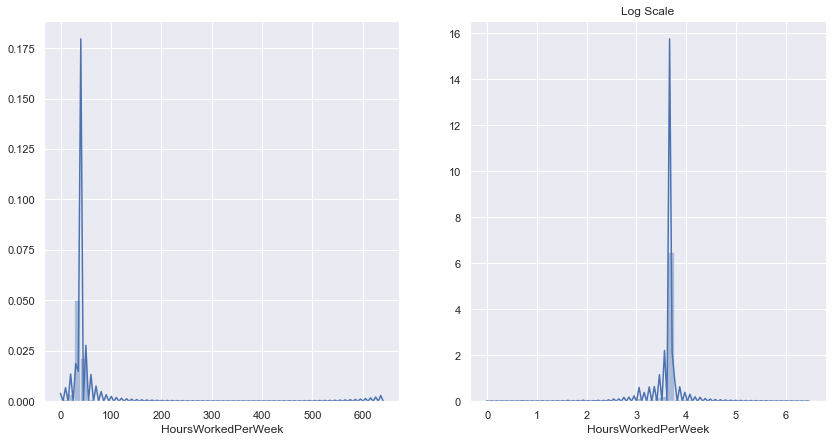

In [226]:
# Transform the InitialIncurredCalimsCost into the log scale
plt.figure(figsize = (14, 7))
plt.subplot(1, 2, 1)
sns.distplot(data['HoursWorkedPerWeek'])
plt.subplot(1, 2, 2)
plt.title('Log Scale')
sns.distplot(np.log1p(data['HoursWorkedPerWeek']))
data['HoursWorkedPerWeek']=np.log1p(data['HoursWorkedPerWeek'])

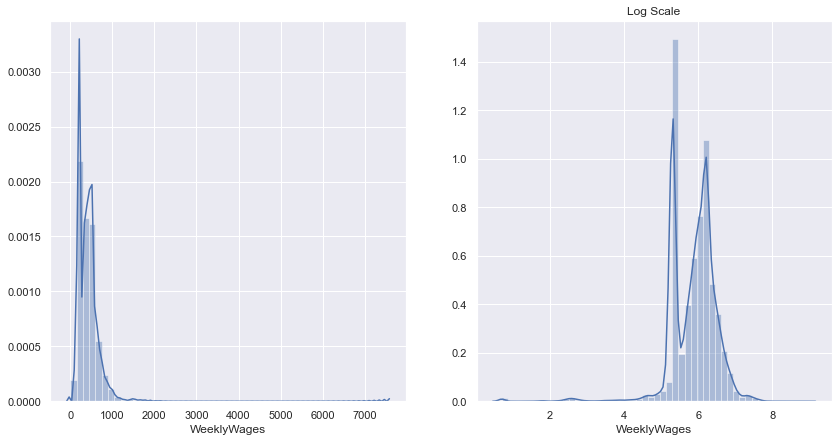

In [183]:
# Transform the InitialIncurredCalimsCost into the log scale
plt.figure(figsize = (14, 7))
plt.subplot(1, 2, 1)
sns.distplot(data['WeeklyWages'])
plt.subplot(1, 2, 2)
plt.title('Log Scale')
sns.distplot(np.log1p(data['WeeklyWages']))
data['WeeklyWages']=np.log1p(data['WeeklyWages'])

## Data Normalization

In [184]:
#dummy_train = pd.get_dummies(data.drop(['ClaimDescription', 'ClaimNumber', 'DateTimeOfAccident', 'DateReported', 'InitialIncurredCalimsCost'], axis = 1))

In [17]:
le=pre.LabelEncoder()

In [18]:
for x in data.select_dtypes(include=('object','category')).columns:
    data[x]=le.fit_transform(data[x])

In [19]:
data.columns

Index(['ClaimNumber', 'DateTimeOfAccident', 'DateReported', 'Age', 'Gender',
       'MaritalStatus', 'DependentChildren', 'DependentsOther', 'WeeklyWages',
       'PartTimeFullTime', 'HoursWorkedPerWeek', 'DaysWorkedPerWeek',
       'ClaimDescription', 'InitialIncurredCalimsCost',
       'UltimateIncurredClaimCost'],
      dtype='object')

In [21]:
data_clean=data[['Age', 'Gender',
       'MaritalStatus', 'DependentChildren', 'DependentsOther', 'WeeklyWages',
       'PartTimeFullTime', 'HoursWorkedPerWeek', 'DaysWorkedPerWeek',
       'ClaimDescription', 'InitialIncurredCalimsCost',
       'UltimateIncurredClaimCost']]

In [22]:
# Getting the output variable
y = data_clean['UltimateIncurredClaimCost']
df_test = data_clean.drop(['UltimateIncurredClaimCost'], axis=1)
mix_max=pre.minmax_scale
X=mix_max(df_test.values)
# Getting the input variables
X=pd.DataFrame(X,columns=df_test.columns.tolist())


## Feature selection

In [23]:
data_clean.columns

Index(['Age', 'Gender', 'MaritalStatus', 'DependentChildren',
       'DependentsOther', 'WeeklyWages', 'PartTimeFullTime',
       'HoursWorkedPerWeek', 'DaysWorkedPerWeek', 'ClaimDescription',
       'InitialIncurredCalimsCost', 'UltimateIncurredClaimCost'],
      dtype='object')

In [24]:
# CatBoostRegressor (Default values)
tic = time.time()
CGB = CatBoostRegressor(logging_level='Silent')    
CGB.fit(X_train, y_train)
print("time (sec):" + "%6.0f" % (time.time() - tic))
 
# Validation MSE
result = mean_squared_error(y_test, CGB.predict(X_test))
#result = mean_squared_error(np.expm1(y_test), np.expm1(CGB.predict(X_test)))
print("MSE:" + "%6.2f" % result)

NameError: name 'X_train' is not defined

In [25]:
(pd.Series(CGB.feature_importances_, index=X_test.columns).nlargest(20).plot(kind='barh'))
plt.show()

NameError: name 'X_test' is not defined

In [229]:
X=X[['Age', 'Gender',
       'MaritalStatus', 'DependentChildren', 'WeeklyWages',
       'HoursWorkedPerWeek', 'DaysWorkedPerWeek',
       'ClaimDescription', 'InitialIncurredCalimsCost',
       'Yearofaccident', 'Hourofaccident',
       'DayOfReportedDelay', 'Acc_Day', 'Acc_Month', 'Acc_Year']]

In [26]:
# Diving our input and output into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, 
                                    test_size=0.33, 
                                    random_state=42
                                   )

## Modeling

In [27]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [28]:
print('#_____________________Linear___________________# ')
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print(lr.score(X_train,y_train))
print(lr.score(X_test, y_test))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

#_____________________Linear___________________# 
0.13842828312843325
0.25582030570877756
26379.90456186812


In [29]:
from mlxtend.regressor import StackingCVRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

xgb = XGBRegressor()
lgbm = LGBMRegressor()
rf = RandomForestRegressor()
ridge = Ridge()
lasso = Lasso()
svr = SVR(kernel='linear')

In [30]:
print('#_____________________Ridge___________________# ')
ridge = Ridge()
ridge.fit(X_train,y_train)
print("Train data :",ridge.score(X_train,y_train))
print("Test data :",ridge.score(X_test,y_test))
pred = ridge.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, pred)))

#_____________________Ridge___________________# 
Train data : 0.1376580858556411
Test data : 0.2511188118558507
26463.10334351877


In [31]:
print('#_____________________Lasso___________________# ')
lasso = Lasso()
lasso.fit(X_train,y_train)
print("Train data :",lasso.score(X_train,y_train))
print("Test data :",lasso.score(X_test,y_test))
pred = lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, pred)))

#_____________________Lasso___________________# 
Train data : 0.13842285485470907
Test data : 0.2557280653729823
26381.539392727766


In [235]:
print('#_____________________SVR___________________# ')
svr = SVR(kernel='linear')
svr.fit(X_train,y_train)
print("Train data :",svr.score(X_train,y_train))
print("Test data :",svr.score(X_test,y_test))
pred = svr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, pred)))

#_____________________SVR___________________# 
Train data : -0.029375068745189692
Test data : -0.048501225677118676
29629.160968624103


In [236]:
print('#_____________________Random Forest___________________# ')
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
print("Train data :",rf.score(X_train,y_train))
print("Test data :",rf.score(X_test,y_test))
pred = rf.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, pred)))

#_____________________Random Forest___________________# 
Train data : 0.8231760502653263
Test data : 0.20825868793627844
25746.994213083257


In [213]:
print('#__________________XG Booster______________________# ')
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
print("Train data :",xgb.score(X_train,y_train))
print("Test data :",xgb.score(X_test,y_test))
pred = xgb.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, pred)))

#__________________XG Booster______________________# 
Train data : 0.8734444238685372
Test data : 0.211682532432927
25691.26312152454


In [215]:
print('#__________________Light Booster______________________# ')
lgbm = LGBMRegressor()
lgbm.fit(X_train,y_train)
print("Train data :",lgbm.score(X_train,y_train))
print("Test data :",lgbm.score(X_test,y_test))
pred = lgbm.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, pred)))

#__________________Light Booster______________________# 
Train data : 0.5126770860722756
Test data : 0.21802771411406885
25587.65950062926


In [218]:
stack = StackingCVRegressor(regressors=(ridge, lasso, rf, lgbm, xgb),
                            meta_regressor=xgb, cv=12,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=42)

stack.fit(X_train, y_train)

StackingCVRegressor(cv=12,
                    meta_regressor=XGBRegressor(base_score=0.5,
                                                booster='gbtree',
                                                colsample_bylevel=1,
                                                colsample_bynode=1,
                                                colsample_bytree=1, gamma=0,
                                                gpu_id=-1,
                                                importance_type='gain',
                                                interaction_constraints='',
                                                learning_rate=0.300000012,
                                                max_delta_step=0, max_depth=6,
                                                min_child_weight=1, missing=nan,
                                                monotone_constraints='()',
                                                n_estimators=100, n_jobs=8,...
                                 

In [219]:
print('#__________________Stacking______________________# ')
print("Train data :",stack.score(X_train,y_train))
print("Test data :",stack.score(X_test,y_test))
pred = stack.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, pred)))

#__________________Stacking______________________# 
Train data : 0.18739747196223644
Test data : 0.16968036192994673
26366.806801787494


In [202]:
Xtrain, Xvalid, ytrain, yvalid = train_test_split(X, y, test_size = 0.2, random_state = 2021)
print(Xtrain.shape, ytrain.shape, Xvalid.shape, yvalid.shape)

(28939, 17) (28939,) (7235, 17) (7235,)


In [203]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
                    learning_rate = 0.01, 
                    n_estimators = 10000,
                    max_depth = 3, 
                    min_child_weight = 0,
                    gamma = 0, 
                    subsample = 0.7,
                    colsample_bytree = 0.7,
                    objective = 'reg:squarederror', 
                    nthread = 1,
                    scale_pos_weight = 1, 
                    seed = 27,
                    reg_alpha = 0.00006
                    )
xgb_model = xgb.fit(Xtrain, ytrain)
xg_vpreds = xgb_model.predict(Xvalid)

print((f"XGBOOST RMSE: {np.sqrt(mean_squared_error(yvalid, xg_vpreds))}"))

XGBOOST RMSE: 28599.584860482195


In [204]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(
               objective = 'regression', 
               num_leaves = 4,
               learning_rate = 0.01, 
               n_estimators = 10000,
               max_bin = 200, 
               bagging_fraction = 0.75,
               bagging_freq = 5, 
               bagging_seed = 7,
               feature_fraction = 0.2,
               feature_fraction_seed = 7,
               verbose = 1,
            )

lgbm_model = lgbm.fit(Xtrain, ytrain)
lg_vpreds = lgbm_model.predict(Xvalid)
print((f"LGBM RMSE: {np.sqrt(mean_squared_error(yvalid, lg_vpreds))}"))

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001468 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1098
[LightGBM] [Info] Number of data po